In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
%cd "/content/drive/MyDrive/IA/IA 2/Pruebas"
!ls

/content/drive/MyDrive/IA/IA 2/Pruebas
 Examples   images  'Load model.ipynb'	 model.ipynb   poke.h5


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import os

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

In [19]:
train_path = 'images/train'
validation_path = 'images/valid'
test_path = 'images/test'

In [20]:
# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(200, 200),
    batch_size=20,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    validation_path,
    target_size=(200, 200),
    batch_size=20,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(200, 200),
    batch_size=20,
    class_mode='categorical'
)

# Load VGG16 base model
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))


Found 4851 images belonging to 3 classes.
Found 1567 images belonging to 3 classes.
Found 1009 images belonging to 3 classes.


In [21]:
# model1 = models.Sequential()
# model1.add(conv_base)
# model1.add(layers.Flatten())
# model1.add(layers.Dense(256, activation='relu'))
# #model1.add(layers.Dropout(0.5))
# model1.add(layers.Dense(3, activation='softmax'))

from tensorflow.keras.layers import BatchNormalization
model1 = models.Sequential()
model1.add(conv_base)
model1.add(layers.Flatten())
model1.add(layers.Dense(256, activation='relu'))
model1.add(BatchNormalization())
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(3, activation='softmax'))

conv_base.trainable = False

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               4718848   
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                      

In [22]:
model1.compile(loss='categorical_crossentropy',
               optimizer=optimizers.RMSprop(learning_rate=2e-5),
               metrics=['acc'])

In [23]:
history = model1.fit(train_generator,
                     steps_per_epoch=25,
                     epochs=15,
                     validation_data=val_generator,
                     validation_steps=25)


Epoch 1/15
25/25 [==============================] - 512s 20s/step - loss: 1.2579 - acc: 0.5255 - val_loss: 1.0102 - val_acc: 0.4620
Epoch 2/15
25/25 [==============================] - 484s 20s/step - loss: 1.0704 - acc: 0.5780 - val_loss: 0.8565 - val_acc: 0.6420
Epoch 3/15
25/25 [==============================] - 481s 20s/step - loss: 0.8549 - acc: 0.6538 - val_loss: 0.7547 - val_acc: 0.6860
Epoch 4/15
25/25 [==============================] - 483s 20s/step - loss: 0.8554 - acc: 0.6700 - val_loss: 0.6205 - val_acc: 0.7780
Epoch 5/15
25/25 [==============================] - 483s 20s/step - loss: 0.6435 - acc: 0.7380 - val_loss: 0.6220 - val_acc: 0.7560
Epoch 6/15
25/25 [==============================] - 439s 18s/step - loss: 0.6926 - acc: 0.7180 - val_loss: 0.5365 - val_acc: 0.7960
Epoch 7/15
25/25 [==============================] - 483s 20s/step - loss: 0.6210 - acc: 0.7580 - val_loss: 0.5187 - val_acc: 0.8180
Epoch 8/15
25/25 [==============================] - 484s 20s/step - loss: 0.

In [24]:
# from tensorflow.keras.layers import BatchNormalization

# model1 = models.Sequential()
# model1.add(conv_base)
# model1.add(layers.Flatten())
# model1.add(layers.Dense(256, activation='relu'))
# model1.add(BatchNormalization())
# model1.add(layers.Dropout(0.5))
# model1.add(layers.Dense(3, activation='softmax'))


In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [26]:
epochs = range(1, len(acc) + 1)

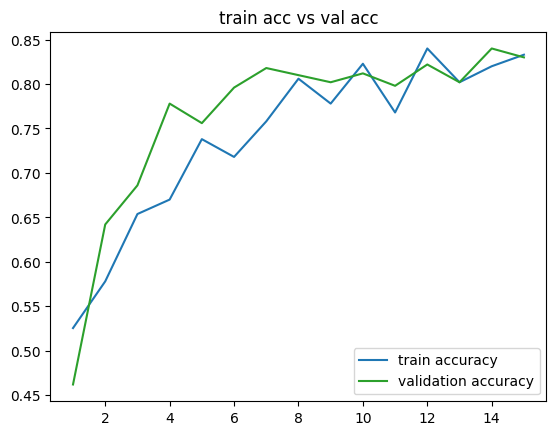

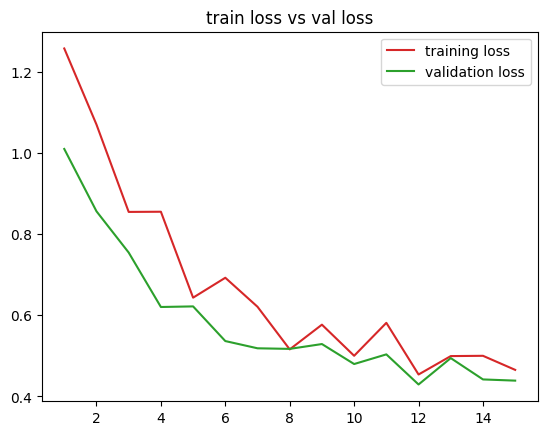

In [27]:
#import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'tab:blue', label='train accuracy')
plt.plot(epochs, val_acc, 'tab:green', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'tab:red', label='training loss')
plt.plot(epochs, val_loss, 'tab:green', label='validation loss')
plt.title('train loss vs val loss')
plt.legend()

plt.show()

51/51 [==============================] - 438s 9s/step


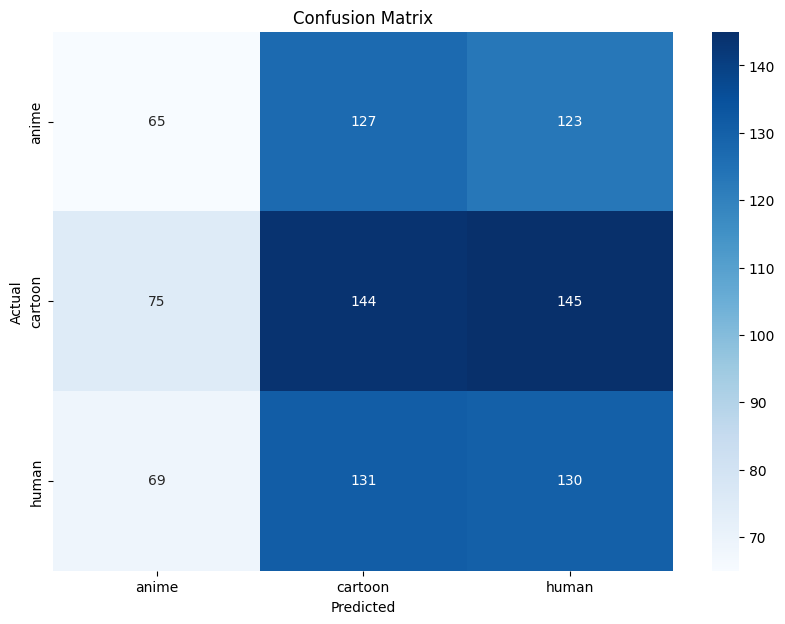

              precision    recall  f1-score   support

       anime       0.31      0.21      0.25       315
     cartoon       0.36      0.40      0.38       364
       human       0.33      0.39      0.36       330

    accuracy                           0.34      1009
   macro avg       0.33      0.33      0.33      1009
weighted avg       0.33      0.34      0.33      1009



In [28]:
# import numpy as np
# import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

class_labels = list(test_generator.class_indices.keys())

y_pred = model1.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_generator.classes

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=class_labels))


In [29]:
model1.save('poke.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
